In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("tl_br_050.csv")
df2 = pd.read_csv("results_brightness.csv")
df2 = df2[df2.brightness_param == 0.50]
df2["n_examples"] = [0 for i in range(len(df2))]
df2_copy = df2.copy(deep=True)
for i in df["n_examples"]:
    df2["n_examples"] = [i for j in range(len(df2))]
    df2_copy = df2_copy.append(df2)
    
df3 = df2[df2.brightness_param == 0.50]
for i in range(len(df3)):
    df = df.append({"n_examples": 0, "accuracy": df3.iloc[i]["pretrained_acc"]}, ignore_index=True)
df = df.sort_values(by="n_examples")

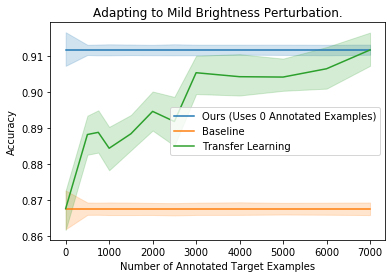

In [104]:
sns.lineplot(x="n_examples", y="tnet_acc", data=df2_copy, label="Ours (Uses 0 Annotated Examples)")
sns.lineplot(x="n_examples", y="pretrained_acc", data=df2_copy, label="Baseline")
ax = sns.lineplot(data=df, x="n_examples", y="accuracy", label="Transfer Learning")
ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Brightness Perturbation.")
plt.savefig("paper_figs/tl_mild_br.pdf")

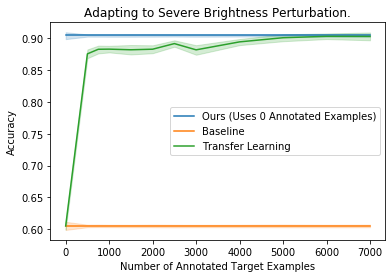

In [105]:
df = pd.read_csv("tl_br_025.csv")
df2 = pd.read_csv("results_brightness.csv")
df2 = df2[df2.brightness_param == 0.25]
df2["n_examples"] = [0 for i in range(len(df2))]
df2_copy = df2.copy(deep=True)
for i in df["n_examples"]:
    df2["n_examples"] = [i for j in range(len(df2))]
    df2_copy = df2_copy.append(df2)
    
df3 = df2[df2.brightness_param == 0.25]
for i in range(len(df3)):
    df = df.append({"n_examples": 0, "accuracy": df3.iloc[i]["pretrained_acc"]}, ignore_index=True)
df = df.sort_values(by="n_examples")


ax = sns.lineplot(x="n_examples", y="tnet_acc", data=df2_copy, label="Ours (Uses 0 Annotated Examples)")
sns.lineplot(x="n_examples", y="pretrained_acc", data=df2_copy, label="Baseline")
sns.lineplot(data=df, x="n_examples", y="accuracy", label="Transfer Learning")
ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Brightness Perturbation.")
plt.savefig("paper_figs/tl_severe_br.pdf")



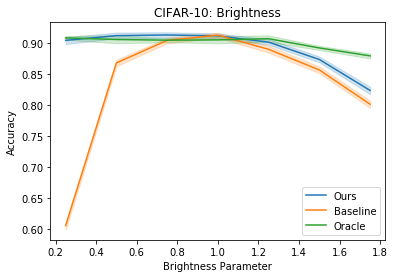

In [106]:
df2 = pd.read_csv("results_brightness.csv")

ax = sns.lineplot(x="brightness_param", y="tnet_acc", data=df2, label="Ours")
sns.lineplot(x="brightness_param", y="pretrained_acc", data=df2, label="Baseline")
sns.lineplot(x="brightness_param", y="oracle_acc", data=df2, label="Oracle")
ax.set(xlabel="Brightness Parameter", ylabel="Accuracy", title="CIFAR-10: Brightness")
plt.savefig("paper_figs/br.pdf")

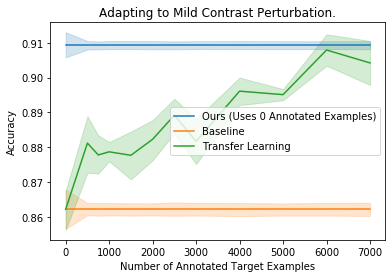

In [111]:
df = pd.read_csv("tl_c_050.csv")
df2 = pd.read_csv("results_contrast.csv")
df2 = df2[df2.contrast_param == 0.50]
df2["n_examples"] = [0 for i in range(len(df2))]
df2_copy = df2.copy(deep=True)
for i in df["n_examples"]:
    df2["n_examples"] = [i for j in range(len(df2))]
    df2_copy = df2_copy.append(df2)
    
df3 = df2[df2.contrast_param == 0.50]
for i in range(len(df3)):
    df = df.append({"n_examples": 0, "accuracy": df3.iloc[i]["pretrained_acc"]}, ignore_index=True)
df = df.sort_values(by="n_examples")

sns.lineplot(x="n_examples", y="tnet_acc", data=df2_copy, label="Ours (Uses 0 Annotated Examples)")
sns.lineplot(x="n_examples", y="pretrained_acc", data=df2_copy, label="Baseline")
ax = sns.lineplot(data=df, x="n_examples", y="accuracy", label="Transfer Learning")
ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Contrast Perturbation.")
plt.savefig("paper_figs/tl_mild_c.pdf")

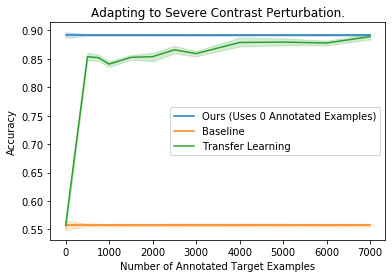

In [110]:
df = pd.read_csv("tl_c_025.csv")
df2 = pd.read_csv("results_contrast.csv")
df2 = df2[df2.contrast_param == 0.25]
df2["n_examples"] = [0 for i in range(len(df2))]
df2_copy = df2.copy(deep=True)
for i in df["n_examples"]:
    df2["n_examples"] = [i for j in range(len(df2))]
    df2_copy = df2_copy.append(df2)
    
df3 = df2[df2.contrast_param == 0.25]
for i in range(len(df3)):
    df = df.append({"n_examples": 0, "accuracy": df3.iloc[i]["pretrained_acc"]}, ignore_index=True)
df = df.sort_values(by="n_examples")


ax = sns.lineplot(x="n_examples", y="tnet_acc", data=df2_copy, label="Ours (Uses 0 Annotated Examples)")
sns.lineplot(x="n_examples", y="pretrained_acc", data=df2_copy, label="Baseline")
ax = sns.lineplot(data=df, x="n_examples", y="accuracy", label="Transfer Learning")
ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Contrast Perturbation.")
plt.savefig("paper_figs/tl_severe_c.pdf")

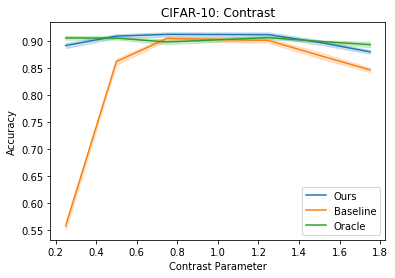

In [101]:
df2 = pd.read_csv("results_contrast.csv")

ax = sns.lineplot(x="contrast_param", y="tnet_acc", data=df2, label="Ours")
sns.lineplot(x="contrast_param", y="pretrained_acc", data=df2, label="Baseline")
sns.lineplot(x="contrast_param", y="oracle_acc", data=df2, label="Oracle")
ax.set(xlabel="Contrast Parameter", ylabel="Accuracy", title="CIFAR-10: Contrast")
plt.savefig("paper_figs/c.pdf")

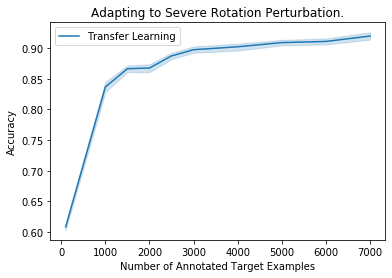

In [114]:
df = pd.read_csv("tl_rot_75.csv")
#df2 = pd.read_csv("results_brightness.csv")
#df2 = df2[df2.brightness_param == 0.50]
#df2["n_examples"] = [0 for i in range(len(df2))]
#df2_copy = df2.copy(deep=True)
#for i in df["n_examples"]:
#    df2["n_examples"] = [i for j in range(len(df2))]
#    df2_copy = df2_copy.append(df2)
    
#df3 = df2[df2.brightness_param == 0.50]
#for i in range(len(df3)):
#    df = df.append({"n_examples": 0, "accuracy": df3.iloc[i]["pretrained_acc"]}, ignore_index=True)
df = df.sort_values(by="n_examples")

# sns.lineplot(x="n_examples", y="tnet_acc", data=df2_copy, label="Ours (Uses 0 Annotated Examples)")
# sns.lineplot(x="n_examples", y="pretrained_acc", data=df2_copy, label="Baseline")
ax = sns.lineplot(data=df, x="n_examples", y="accuracy", label="Transfer Learning")
ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Severe Rotation Perturbation.")
plt.savefig("paper_figs/tl_severe_rot.pdf")

In [ ]:
df = pd.read_csv("tl_rot_30.csv")
#df2 = pd.read_csv("results_brightness.csv")
#df2 = df2[df2.brightness_param == 0.50]
#df2["n_examples"] = [0 for i in range(len(df2))]
#df2_copy = df2.copy(deep=True)
#for i in df["n_examples"]:
#    df2["n_examples"] = [i for j in range(len(df2))]
#    df2_copy = df2_copy.append(df2)
    
#df3 = df2[df2.brightness_param == 0.50]
#for i in range(len(df3)):
#    df = df.append({"n_examples": 0, "accuracy": df3.iloc[i]["pretrained_acc"]}, ignore_index=True)
df = df.sort_values(by="n_examples")

# sns.lineplot(x="n_examples", y="tnet_acc", data=df2_copy, label="Ours (Uses 0 Annotated Examples)")
# sns.lineplot(x="n_examples", y="pretrained_acc", data=df2_copy, label="Baseline")
ax = sns.lineplot(data=df, x="n_examples", y="accuracy", label="Transfer Learning")
ax.set(xlabel="Number of Annotated Target Examples", ylabel="Accuracy", title="Adapting to Mild Rotation Perturbation.")
plt.savefig("paper_figs/tl_mild_rot.pdf")